<a href="https://colab.research.google.com/github/MtraMonica/casas/blob/main/RNPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Declarar librerias

In [81]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Cargar el dataset (archivo)

In [82]:
url='https://raw.githubusercontent.com/MtraMonica/estatus-casas/main/california_housing_test%20(1).csv'
df =pd.read_csv(url)
print(df.head(5))

   longitude  latitude  ...  median_income  median_house_value
0    -122.05     37.37  ...         6.6085            344700.0
1    -118.30     34.26  ...         3.5990            176500.0
2    -117.81     33.78  ...         5.7934            270500.0
3    -118.36     33.82  ...         6.1359            330000.0
4    -119.67     36.33  ...         2.9375             81700.0

[5 rows x 9 columns]


In [83]:
df.shape

(3000, 9)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [85]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [86]:
df.latitude.describe()

count    3000.00000
mean       35.63539
std         2.12967
min        32.56000
25%        33.93000
50%        34.27000
75%        37.69000
max        41.92000
Name: latitude, dtype: float64

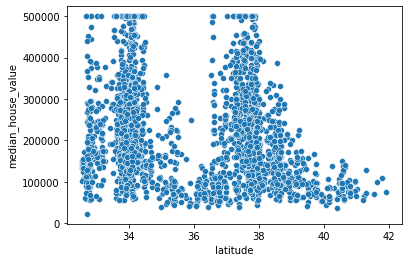

In [87]:
sns.scatterplot(x='latitude',y='median_house_value',data=df)

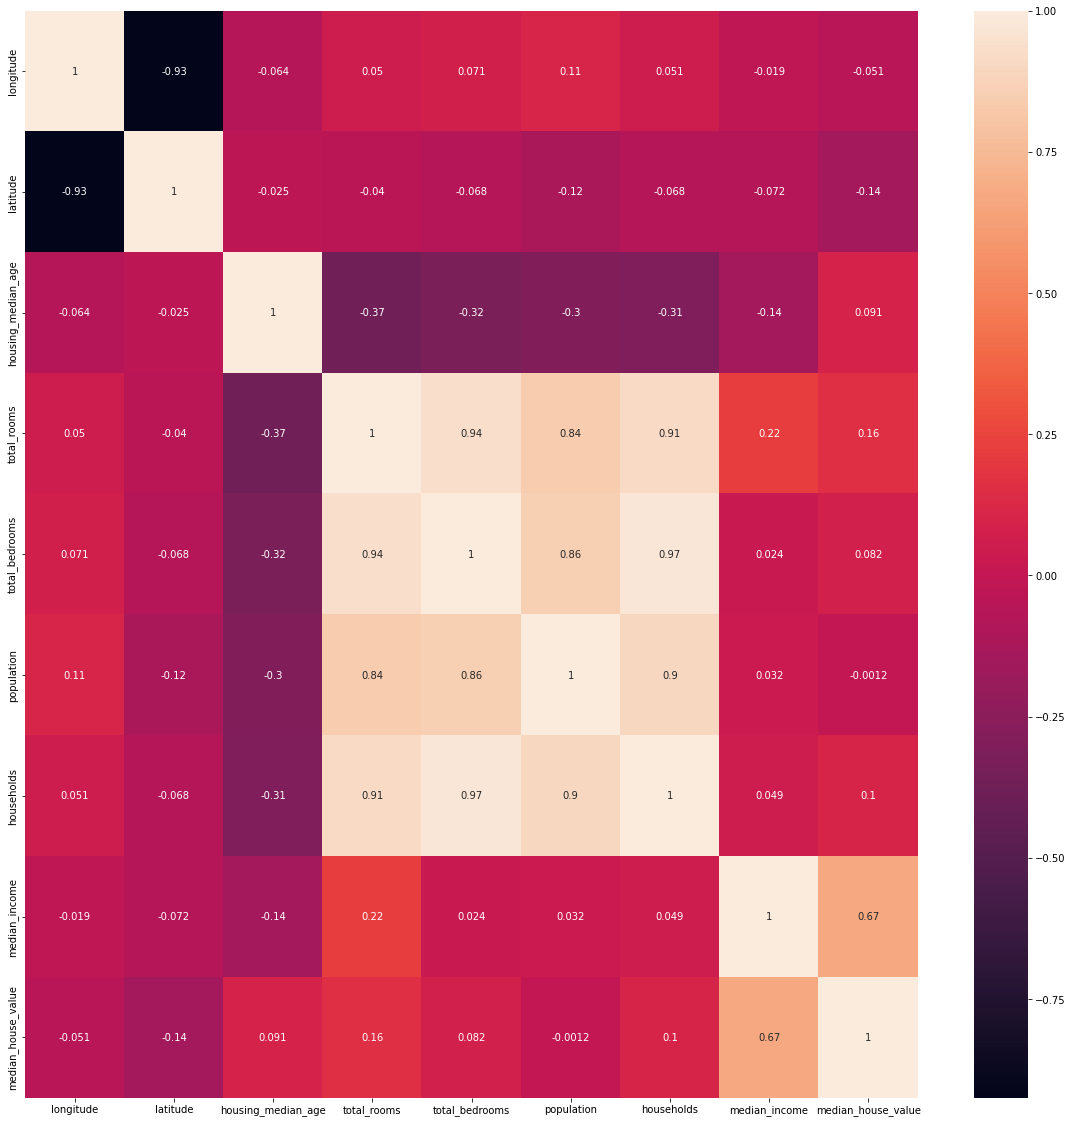

In [88]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [89]:
select_features=['longitude','total_rooms','total_bedrooms','median_house_value']

In [90]:
x=df[select_features]
y=df['median_house_value']

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
y=y.values.reshape(-1,1)
y_scaled=scaler.fit_transform(y)


Entrenamiento de la red

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_scaled,y_scaled,test_size=0.25)

Red Neuronal

In [94]:
model=tf.keras.models.Sequential()
model.add (tf.keras.layers.Dense(units=100,activation='relu',input_shape=(4, )))
model.add (tf.keras.layers.Dense (units=100,activation='relu'))
model.add (tf.keras.layers.Dense (units=100,activation='relu'))
model.add (tf.keras.layers.Dense (units=1,activation='linear'))

In [95]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               500       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile (optimizer='Adam',loss='mean_squared_error')

In [104]:
epochs_hist=model.fit (X_train, y_train, epochs=500,batch_size=50, validation_split=0.2)

Epoch 1/500
36/36 [==============================] - 0s 5ms/step - loss: 1.1191e-06 - val_loss: 1.4409e-06
Epoch 2/500
36/36 [==============================] - 0s 4ms/step - loss: 1.2945e-06 - val_loss: 3.4945e-06
Epoch 3/500
36/36 [==============================] - 0s 4ms/step - loss: 5.5479e-06 - val_loss: 3.4154e-06
Epoch 4/500
36/36 [==============================] - 0s 4ms/step - loss: 6.5470e-06 - val_loss: 3.3203e-05
Epoch 5/500
36/36 [==============================] - 0s 4ms/step - loss: 1.0758e-05 - val_loss: 5.6674e-06
Epoch 6/500
36/36 [==============================] - 0s 4ms/step - loss: 4.8145e-06 - val_loss: 4.6206e-06
Epoch 7/500
36/36 [==============================] - 0s 4ms/step - loss: 2.8098e-06 - val_loss: 2.1868e-06
Epoch 8/500
36/36 [==============================] - 0s 4ms/step - loss: 1.5107e-06 - val_loss: 1.8509e-06
Epoch 9/500
36/36 [==============================] - 0s 4ms/step - loss: 1.6221e-06 - val_loss: 2.8251e-06
Epoch 10/500
36/36 [=================

Evaluando modelo

In [98]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Gráfico

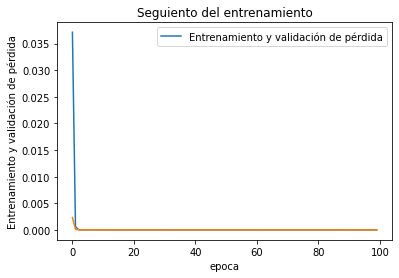

In [99]:
plt.plot(epochs_hist.history['loss'])
plt.plot (epochs_hist.history['val_loss'])
plt.title ('Seguiento del entrenamiento')
plt.xlabel ('epoca')
plt.ylabel ('Entrenamiento y validación de pérdida')
plt.legend(['Entrenamiento y validación de pérdida'])

Predecir el precio de acuerdo a los siguientes valores

In [100]:
X_test_1=np.array([[-119.86, 1450, 642.00, 225000]])

In [101]:
scaler_1=MinMaxScaler()
X_test_scaled_1=scaler_1.fit_transform(X_test_1)

Aplicar predicción

In [102]:
y_predict_1=model.predict(X_test_scaled_1)

Predecir el precio correctamente

In [103]:
y_predict_1=scaler.inverse_transform(y_predict_1)
print (y_predict_1)

[[28636.13]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')